### GitHub Repository: https://github.com/aamishrafique/Machine-Learning

In [68]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
import warnings
warnings.filterwarnings('ignore')

In [69]:
DataFrame = pd.read_csv('ECG200_TRAIN.csv', delimiter='  ', header=None)
print(DataFrame)

     0         1         2         3         4         5         6         7   \
0  -1.0  0.502055  0.542163  0.722383  1.428885  2.136516  2.281149  1.936274   
1   1.0  0.147647  0.804668  0.367771  0.243894  0.026614 -0.274402  0.096731   
2  -1.0  0.316646  0.243199  0.370471  1.063738  1.678187  1.759558  1.697717   
3  -1.0  1.168874  2.075901  1.760141  1.606446  1.949046  1.302842  0.459332   
4   1.0  0.648658  0.752026  2.636231  3.455716  2.118157  0.520620 -0.188627   
..  ...       ...       ...       ...       ...       ...       ...       ...   
95  1.0  0.581277  0.876188  1.042767  1.796120  2.541399  2.246653  1.500387   
96 -1.0  2.689017  2.708703  2.008381  2.235800  1.516982  0.029916 -0.561346   
97 -1.0  0.197677  0.455417  0.973110  1.935956  2.259463  1.741341  1.158296   
98  1.0  0.179500  1.038409  1.946421  2.705141  1.670706 -0.101167 -1.578876   
99  1.0  0.073124  0.776054  2.181336  3.440325  2.168475  0.497315 -0.924284   

          8         9   ...

# Pre-Processing

In [70]:
print('The total number of NaN values in the Data Frame:', DataFrame.isnull().sum().sum())

The total number of NaN values in the Data Frame: 0


(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 69.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

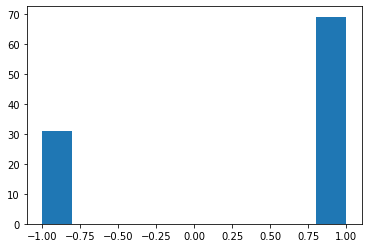

In [71]:
# print(DataFrame[0].value_counts())
plt.hist(DataFrame[0])

In [72]:
DataFrame = DataFrame.sort_values([0]).reset_index(drop=True)
print(DataFrame)

     0         1         2         3         4         5         6         7   \
0  -1.0  0.502055  0.542163  0.722383  1.428885  2.136516  2.281149  1.936274   
1  -1.0  2.041298  2.021590  1.925895  2.334360  1.173874 -0.452548 -0.728089   
2  -1.0  0.314220  0.781063  1.204968  1.534697  1.877331  2.158214  2.102972   
3  -1.0  0.651739  1.237034  2.109448  1.432443  0.786701 -0.459460 -0.363299   
4  -1.0  1.468417  3.253946  3.599510  2.393377  0.417377  1.071454  1.685863   
..  ...       ...       ...       ...       ...       ...       ...       ...   
95  1.0  0.319309  2.091695  3.443776  2.233017  2.302414  0.621608 -0.886664   
96  1.0  0.630396  2.191977  3.520900  2.730039  2.138940  0.560727 -0.678532   
97  1.0  0.535811  0.600766  2.115888  3.348072  2.045148  1.441588  0.104841   
98  1.0  0.780978  1.340804  1.963279  3.092512  3.720899  3.026452  1.980515   
99  1.0  0.073124  0.776054  2.181336  3.440325  2.168475  0.497315 -0.924284   

          8         9   ...

# Splitting the Data into Train and Test by Using NumPy

In [73]:
# Applying K-Fold Cross-Validation, where K = 3
List = []
List.append(pd.concat([DataFrame.iloc[:10], DataFrame.iloc[31:54]]))
List.append(pd.concat([DataFrame.iloc[10:20], DataFrame.iloc[54:77]]))
List.append(pd.concat([DataFrame.iloc[20:31], DataFrame.iloc[77:]]))

In [74]:
KNN = KNeighborsClassifier()

# The First Fold
Train = pd.concat([List[0], List[1]])
Test = List[2]
XTrain = Train.iloc[:, 1:]
YTrain = Train.iloc[:, 0:1]
XTest = Test.iloc[:, 1:]
YTest = Test.iloc[:, 0:1]
KNN = KNN.fit(XTrain, YTrain)
Prediction = KNN.predict(XTest)
TotalAccuracy = KNN.score(XTest, YTest)

# The Second Fold
Train = pd.concat([List[1], List[2]])
Test = List[0]
XTrain = Train.iloc[:, 1:]
YTrain = Train.iloc[:, 0:1]
XTest = Test.iloc[:, 1:]
YTest = Test.iloc[:, 0:1]
KNN = KNN.fit(XTrain, YTrain)
Prediction = KNN.predict(XTest)
TotalAccuracy += KNN.score(XTest, YTest)

# The Third Fold
Train = pd.concat([List[0], List[2]])
Test = List[1]
XTrain = Train.iloc[:, 1:]
YTrain = Train.iloc[:, 0:1]
XTest = Test.iloc[:, 1:]
YTest = Test.iloc[:, 0:1]
KNN = KNN.fit(XTrain, YTrain)
Prediction = KNN.predict(XTest)
TotalAccuracy += KNN.score(XTest, YTest)

In [75]:
print('The Average Accuracy is:', TotalAccuracy/3)

The Average Accuracy is: 0.7795603089720737


# Splitting the Data into Train and Test by Using Scikit-Learn

In [76]:
X = DataFrame.drop(0, axis=1)
Y = DataFrame[0]
Validate = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(KNN, X, Y, cv=Validate)
print('The Average Accuracy is:', mean(scores))

The Average Accuracy is: 0.8400000000000001


In [ ]:
# When we split the data using Scikit-Learn and apply K-Fold Cross-Validation, our results are better with a mean accuracy of 84%
# compared to splitting using NumPy. In this case our accuracy is 77.9%. The Scikit-Learn generated way better results and in this case
# performs better and is recommended.